In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj1.ok')

Assignment: proj1
OK, version v1.13.11



# Project 1: Food Safety 
## Cleaning and Exploring Data with Pandas
## Due Date: Tuesday 09/24, 11:59 PM
## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *Chelsey Fang*


## This Assignment
<img src="scoreCard.jpg" width=400>

In this project, you will investigate restaurant food safety scores for restaurants in San Francisco. Above is a sample score card for a restaurant. The scores and violation information have been made available by the San Francisco Department of Public Health. The main goal for this assignment is to understand how restaurants are scored. We will walk through various steps of exploratory data analysis to do this. We will provide comments and insights along the way to give you a sense of how we arrive at each discovery and what next steps it leads to.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Exploring characteristics and distributions of individual variables

## Score Breakdown
Question | Points
--- | ---
1a | 1
1b | 0
1c | 0
1d | 3
1e | 1
2a | 1
2b | 2
3a | 2
3b | 0
3c | 2
3d | 1
3e | 1
3f | 1
4a | 2
4b | 3
5a | 1
5b | 1
5c | 1
6a | 2
6b | 3
6c | 3
7a | 2
7b | 2
7c | 6
7d | 2
7e | 3
Total | 46

To start the assignment, run the cell below to set up some imports and the automatic tests that we will need for this assignment:

In many of these assignments (and your future adventures as a data scientist) you will use `os`, `zipfile`, `pandas`, `numpy`, `matplotlib.pyplot`, and optionally `seaborn`.  

1. Import each of these libraries as their commonly used abbreviations (e.g., `pd`, `np`, `plt`, and `sns`).  
1. Don't forget to include `%matplotlib inline` which enables [inline matploblib plots](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). 
1. If you want to use `seaborn`, add the line `sns.set()` to make your plots look nicer.

In [2]:
import os 
import zipfile 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
import sys

assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt

## Downloading the Data

For this assignment, we need this data file: http://www.ds100.org/fa19/assets/datasets/proj1-SFBusinesses.zip

We could write a few lines of code that are built to download this specific data file, but it's a better idea to have a general function that we can reuse for all of our assignments. Since this class isn't really about the nuances of the Python file system libraries, we've provided a function for you in ds100_utils.py called `fetch_and_cache` that can download files from the internet.

This function has the following arguments:
- `data_url`: the web address to download
- `file`: the file in which to save the results
- `data_dir`: (`default="data"`) the location to save the data
- `force`: if true the file is always re-downloaded 

The way this function works is that it checks to see if `data_dir/file` already exists. If it does not exist already or if `force=True`, the file at `data_url` is downloaded and placed at `data_dir/file`. The process of storing a data file for reuse later is called caching. If `data_dir/file` already and exists `force=False`, nothing is downloaded, and instead a message is printed letting you know the date of the cached file.

The function returns a `pathlib.Path` object representing the location of the file ([pathlib docs](https://docs.python.org/3/library/pathlib.html#basic-use)). 

In [4]:
import ds100_utils
source_data_url = 'http://www.ds100.org/fa19/assets/datasets/proj1-SFBusinesses.zip'
target_file_name = 'data.zip'

# Change the force=False -> force=True in case you need to force redownload the data
dest_path = ds100_utils.fetch_and_cache(
    data_url=source_data_url, 
    data_dir='.', 
    file=target_file_name, 
    force=False)

Using cached version that was downloaded (UTC): Mon Sep 16 12:51:01 2019


After running the cell above, if you list the contents of the directory containing this notebook, you should see `data.zip`.

*Note*: The command below starts with an `!`. This tells our Jupyter notebook to pass this command to the operating system. In this case, the command is the `ls` Unix command which lists files in the current directory.

In [5]:
!ls

data		proj1.ipynb  __pycache__  q7d.png	 test.tplx
data.zip	proj1.ok     q6a.png	  scoreCard.jpg
ds100_utils.py	proj1.pdf    q7c2.png	  tests


---
## 0. Before You Start

For all the assignments with programming practices, please write down your answer in the answer cell(s) right below the question. 

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run codes, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors in running Autograder, and sometimes fail to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

## 1: Loading Food Safety Data

We have data, but we don't have any specific questions about the data yet. Let's focus on understanding the structure of the data; this involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

Let's start by looking at the contents of `data.zip`. It's not a just single file but rather a compressed directory of multiple files. We could inspect it by uncompressing it using a shell command such as `!unzip data.zip`, but in this project we're going to do almost everything in Python for maximum portability.

### Question 1a: Looking Inside and Extracting the Zip Files

Assign `my_zip` to a `zipfile.Zipfile` object representing `data.zip`, and assign `list_files` to a list of all the names of the files in `data.zip`.

*Hint*: The [Python docs](https://docs.python.org/3/library/zipfile.html) describe how to create a `zipfile.ZipFile` object. You might also look back at the code from lecture and lab 4's optional hacking challenge. It's OK to copy and paste code from previous assignments and demos, though you might get more out of this exercise if you type out an answer.

<!--
BEGIN QUESTION
name: q1a
points: 1
-->

In [6]:
my_zip = zipfile.ZipFile(dest_path, 'r')
list_names = my_zip.namelist()
list_names

['violations.csv', 'businesses.csv', 'inspections.csv', 'legend.csv']

In [7]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In your answer above, if you have written something like `zipfile.ZipFile('data.zip', ...)`, we suggest changing it to read `zipfile.ZipFile(dest_path, ...)`. In general, we **strongly suggest having your filenames hard coded as string literals only once** in a notebook. It is very dangerous to hard code things twice because if you change one but forget to change the other, you can end up with bugs that are very hard to find.

Now display the files' names and their sizes.

If you're not sure how to proceed, read about the attributes of a `ZipFile` object in the Python docs linked above.

In [8]:
for i in my_zip.infolist():
    print (i.filename) 
    print (i.file_size)    

violations.csv
3726206
businesses.csv
660231
inspections.csv
466106
legend.csv
120


Often when working with zipped data, we'll never unzip the actual zipfile. This saves space on our local computer. However, for this project the files are small, so we're just going to unzip everything. This has the added benefit that you can look inside the csv files using a text editor, which might be handy for understanding the structure of the files. The cell below will unzip the csv files into a subdirectory called `data`. Simply run this cell, i.e. don't modify it.

In [9]:
from pathlib import Path
data_dir = Path('data')
my_zip.extractall(data_dir)
!ls {data_dir}

businesses.csv	inspections.csv  legend.csv  violations.csv


The cell above created a folder called `data`, and in it there should be four CSV files. Let's open up `legend.csv` to see its contents. To do this, click on 'Jupyter' in the top left, then navigate to fa19/proj/proj1/data/ and click on `legend.csv`. The file will open up in another tab. You should see something that looks like:

    "Minimum_Score","Maximum_Score","Description"
    0,70,"Poor"
    71,85,"Needs Improvement"
    86,90,"Adequate"
    91,100,"Good"

### Question 1b: Programatically Looking Inside the Files

The `legend.csv` file does indeed look like a well-formed CSV file. Let's check the other three files. Rather than opening up each file manually, let's use Python to print out the first 5 lines of each. The `ds100_utils` library has a method called `head` that will allow you to retrieve the first N lines of a file as a list. For example `ds100_utils.head('data/legend.csv', 5)` will return the first 5 lines of "data/legend.csv". Try using this function to print out the first 5 lines of all four files that we just extracted from the zipfile.

In [10]:
print (ds100_utils.head('data/legend.csv', 5))
print (ds100_utils.head('data/businesses.csv', 5))
print (ds100_utils.head('data/inspections.csv', 5))
print (ds100_utils.head('data/violations.csv', 5))



['"Minimum_Score","Maximum_Score","Description"\n', '0,70,"Poor"\n', '71,85,"Needs Improvement"\n', '86,90,"Adequate"\n', '91,100,"Good"\n']
['"business_id","name","address","city","state","postal_code","latitude","longitude","phone_number"\n', '19,"NRGIZE LIFESTYLE CAFE","1200 VAN NESS AVE, 3RD FLOOR","San Francisco","CA","94109","37.786848","-122.421547","+14157763262"\n', '24,"OMNI S.F. HOTEL - 2ND FLOOR PANTRY","500 CALIFORNIA ST, 2ND  FLOOR","San Francisco","CA","94104","37.792888","-122.403135","+14156779494"\n', '31,"NORMAN\'S ICE CREAM AND FREEZES","2801 LEAVENWORTH ST ","San Francisco","CA","94133","37.807155","-122.419004",""\n', '45,"CHARLIE\'S DELI CAFE","3202 FOLSOM ST ","San Francisco","CA","94110","37.747114","-122.413641","+14156415051"\n']
['"business_id","score","date","type"\n', '19,"94","20160513","routine"\n', '19,"94","20171211","routine"\n', '24,"98","20171101","routine"\n', '24,"98","20161005","routine"\n']
['"business_id","date","description"\n', '19,"20171211"

### Question 1c: Reading in the Files

Based on the above information, let's attempt to load `businesses.csv`, `inspections.csv`, and `violations.csv` into pandas dataframes with the following names: `bus`, `ins`, and `vio` respectively.

*Note:* Because of character encoding issues one of the files (`bus`) will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. At some point in your future, you should read all about [character encodings](https://www.diveinto.org/python3/strings.html). We won't discuss these in detail in DS100.

In [11]:
# path to directory containing data
dsDir = Path('data')

bus = pd.read_csv(dsDir/"businesses.csv", encoding='ISO-8859-1')
ins = pd.read_csv(dsDir/"inspections.csv")
vio = pd.read_csv(dsDir/"violations.csv") 

Now that you've read in the files, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `bus`, `ins`, and `vio` dataframes. To show multiple return outputs in one single cell, you can use `display()`. Use `Dataframe.describe` to learn about the numeric columns.

In [12]:
display(bus.head())
display(ins.head())
display(vio.head())

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


The `DataFrame.describe` method can also be handy for computing summaries of various statistics of our dataframes. Try it out with each of our 3 dataframes.

In [13]:
display(bus.describe())
display(ins.describe())
display(vio.describe())


,business_id,latitude,longitude
count,6406.000000,3270.000000,3270.000000
mean,53058.248049,37.773662,-122.425791
std,34928.238762,0.022910,0.027762
min,19.000000,37.668824,-122.510896
25%,7405.500000,37.760487,-122.436844
50%,68294.500000,37.780435,-122.418855
75%,83446.500000,37.789951,-122.406609
max,94574.000000,37.824494,-122.368257


,business_id,score,date
count,14222.000000,14222.000000,1.422200e+04
mean,45138.752637,90.697370,2.016242e+07
std,34497.913056,8.088705,8.082778e+03
min,19.000000,48.000000,2.015013e+07
25%,5634.000000,86.000000,2.016021e+07
50%,61462.000000,92.000000,2.016091e+07
75%,78074.000000,96.000000,2.017061e+07
max,94231.000000,100.000000,2.018012e+07


,business_id,date
count,39042.000000,3.904200e+04
mean,45674.440244,2.016283e+07
std,34172.433276,7.874679e+03
min,19.000000,2.015013e+07
25%,4959.000000,2.016031e+07
50%,62060.000000,2.016092e+07
75%,77681.000000,2.017063e+07
max,94231.000000,2.018012e+07


Now, we perform some sanity checks for you to verify that you loaded the data with the right structure. Run the following cells to load some basic utilities (you do not need to change these at all):

First, we check the basic structure of the data frames you created:

In [14]:
assert all(bus.columns == ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                           'latitude', 'longitude', 'phone_number'])
assert 6400 <= len(bus) <= 6420

assert all(ins.columns == ['business_id', 'score', 'date', 'type'])
assert 14210 <= len(ins) <= 14250

assert all(vio.columns == ['business_id', 'date', 'description'])
assert 39020 <= len(vio) <= 39080

Next we'll check that the statistics match what we expect. The following are hard-coded statistical summaries of the correct data.

In [15]:
bus_summary = pd.DataFrame(**{'columns': ['business_id', 'latitude', 'longitude'],
 'data': {'business_id': {'50%': 68294.5, 'max': 94574.0, 'min': 19.0},
  'latitude': {'50%': 37.780435, 'max': 37.824494, 'min': 37.668824},
  'longitude': {'50%': -122.41885450000001,
   'max': -122.368257,
   'min': -122.510896}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['business_id', 'score'],
 'data': {'business_id': {'50%': 61462.0, 'max': 94231.0, 'min': 19.0},
  'score': {'50%': 92.0, 'max': 100.0, 'min': 48.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['business_id'],
 'data': {'business_id': {'50%': 62060.0, 'max': 94231.0, 'min': 19.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses dataframe:')
display(bus_summary)
print('What we expect from your Inspections dataframe:')
display(ins_summary)
print('What we expect from your Violations dataframe:')
display(vio_summary)

What we expect from your Businesses dataframe:


,business_id,latitude,longitude
min,19.0,37.668824,-122.510896
50%,68294.5,37.780435,-122.418855
max,94574.0,37.824494,-122.368257


What we expect from your Inspections dataframe:


,business_id,score
min,19.0,48.0
50%,61462.0,92.0
max,94231.0,100.0


What we expect from your Violations dataframe:


,business_id
min,19.0
50%,62060.0
max,94231.0


The code below defines a testing function that we'll use to verify that your data has the same statistics as what we expect. Run these cells to define the function. The `df_allclose` function has this name because we are verifying that all of the statistics for your dataframe are close to the expected values. Why not `df_allequal`? It's a bad idea in almost all cases to compare two floating point values like 37.780435, as rounding error can cause spurious failures.

## Question 1d: Verifying the data

Now let's run the automated tests. If your dataframes are correct, then the following cell will seem to do nothing, which is a good thing! However, if your variables don't match the correct answers in the main summary statistics shown above, an exception will be raised.

<!--
BEGIN QUESTION
name: q1d
points: 3
-->

In [16]:
"""Run this cell to load this utility comparison function that we will use in various
tests below (both tests you can see and those we run internally for grading).

Do not modify the function in any way.
"""


def df_allclose(actual, desired, columns=None, rtol=5e-2):
    """Compare selected columns of two dataframes on a few summary statistics.
    
    Compute the min, median and max of the two dataframes on the given columns, and compare
    that they match numerically to the given relative tolerance.
    
    If they don't match, an AssertionError is raised (by `numpy.testing`).
    """    
    # summary statistics to compare on
    stats = ['min', '50%', 'max']
    
    # For the desired values, we can provide a full DF with the same structure as
    # the actual data, or pre-computed summary statistics.
    # We assume a pre-computed summary was provided if columns is None. In that case, 
    # `desired` *must* have the same structure as the actual's summary
    if columns is None:
        des = desired
        columns = desired.columns
    else:
        des = desired[columns].describe().loc[stats]

    # Extract summary stats from actual DF
    act = actual[columns].describe().loc[stats]

    return np.allclose(act, des, rtol)

In [17]:
ok.grade("q1d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1e: Identifying Issues with the Data

Use the `head` command on your three files again. This time, describe at least one potential problem with the data you see. Consider issues with missing values and bad data.

<!--
BEGIN QUESTION
name: q1e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

In [18]:
display(bus.head())
display(ins.head())
display(vio.head())

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


I initially noticed that in the Business file, the phone number for Norman's Ice Cream and Freezes was missing. A missing phone number could lead to a poor plot if we were looking at a phone number as a variable. 


Also, I noticed that the dates in the inspections and violations files are displayed as one numerical value, not separated by dashes or hyphens to distinguish the day/month/year. 

We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables individually. Let's begin with the businesses file, which has been read into the `bus` dataframe.

---
## 2: Examining the Business Data

From its name alone, we expect the `businesses.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

### Question 2a

Examining the entries in `bus`, is the `business_id` unique for each record that is each row of data? Your code should compute the answer, i.e. don't just hard code `True` or `False`.

Hint: use `value_counts()` or `unique()` to determine if the `business_id` series has any duplicates.

<!--
BEGIN QUESTION
name: q2a
points: 1
-->

In [19]:
is_business_id_unique = bus["business_id"].is_unique

True

In [20]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2b

With this information, you can address the question of granularity. Answer the questions below.

1. What does each record represent (e.g., a business, a restaurant, a location, etc.)?  
1. What is the primary key?
1. What would you find by grouping by the following columns: `business_id`, `name`, `address` each individually?

Please write your answer in the markdown cell below. You may create new cells below your answer to run code, but **please never add cells between a question cell and the answer cell below it.**

<!--
BEGIN QUESTION
name: q2b
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

1) Each record represents a business and its attributes such as its location and phone number. 

2) The primary key in this case is the business id since they are unique for each record. 

3) When I grouped the business.csv file by business_id, I got in return the same set up as the regular csv file, except it was only indexed by the id. When grouped by the name, I noticed that the column "postal_code" disappeared, as did the "phone_number" column. When grouped by the address, the same thing happened. Also I noticed there were many more missing values than I initially thought when I grouped the data by the business id. 

In [21]:
# use this cell for scratch work
display (bus.groupby("business_id").agg('min').head())

display(bus.groupby("name").agg('min').head())

display(bus.groupby("address").agg('min').head())

,name,address,city,state,postal_code,latitude,longitude,phone_number
business_id,,,,,,,,
19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


,business_id,address,city,state,latitude,longitude
name,,,,,,
MAGNOLIA BREWING COMPANY,93539,1398 HAIGHT ST,San Francisco,CA,NaN,NaN
NORDSTROM CAFE BISTRO,1674,865 MARKET ST,San Francisco,CA,37.784317,-122.407563
100% DESSERT CAFE,37633,2512 CLEMENT ST,San Francisco,CA,37.781988,-122.486252
111 MINNA GALLERY,65776,111 MINNA ST,San Francisco,CA,37.787378,-122.399459
12 TRIBES KOSHER FOODS,68597,3200 CALIFORNIA ST,San Francisco,CA,37.787311,-122.446839


,business_id,name,city,state,latitude,longitude
address,,,,,,
,77922,ASDLJDLST G FDH,San Francisco,CA,NaN,NaN
16TH AND SHOTWELL ST,62277,TACOS SAN BUENA,San Francisco,CA,37.779847,-122.418985
1700 O'FARRELL @ FILLMORE ST,33998,COASTSIDE FARMS AND SPECIALTIES,San Francisco,CA,NaN,NaN
377,7477,HARBOR EMPEROR,San Francisco,CA,37.808494,-122.412000
APPROVED LOCATIONS,85316,CURRY UP NOW,San Francisco,CA,NaN,NaN


---
## 3: Zip Codes

Next, let's  explore some of the variables in the business table. We begin by examining the postal code.

### Question 3a

Answer the following questions about the `postal code` column in the `bus` data frame?  
1. Are ZIP codes quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. What data type is used to represent a ZIP code?

*Note*: ZIP codes and postal codes are the same thing.

<!--
BEGIN QUESTION
name: q3a
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

1) Although a ZIP code is a numerical value, it is qualitative data. Performing numerical operations on ZIP codes won't get anything done with our data. A ZIP code is a nominal variable because there is little meaning to differences or proportions of different ZIP codes.

2) A ZIP code is represented by a string of integers since it is a categorical variable.

### Question 3b

How many restaurants are in each ZIP code? 

In the cell below, create a series where the index is the postal code and the value is the number of records with that postal code in descending order of count. 94110 should be at the top with a count of 596. You'll need to use `groupby()`. You may also want to use `.size()` or `.value_counts()`. 

<!--
BEGIN QUESTION
name: q3b
points: 0
-->

In [22]:
zip_counts = bus.groupby("postal_code",as_index=True).size().sort_values(ascending=False)
zip_counts.head()

postal_code
94110    596
94103    552
94102    462
94107    460
94133    426
dtype: int64

Did you take into account that some businesses have missing ZIP codes?

In [23]:
print('zip_counts describes', sum(zip_counts), 'records.')
print('The original data have', len(bus), 'records')

zip_counts describes 6166 records.
The original data have 6406 records


Missing data is extremely common in real-world data science projects. There are several ways to include missing postal codes in the `zip_counts` series above. One approach is to use the `fillna` method of the series, which will replace all null (a.k.a. NaN) values with a string of our choosing. In the example below, we picked "?????". When you run the code below, you should see that there are 240 businesses with missing zip code.

In [24]:
zip_counts = bus.fillna("?????").groupby("postal_code").size().sort_values(ascending=False)
zip_counts.head(15)

postal_code
94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
?????    240
94105    232
94108    228
94114    223
94117    204
dtype: int64

An alternate approach is to use the DataFrame `value_counts` method with the optional argument `dropna=False`, which will ensure that null values are counted. In this case, the index will be `NaN` for the row corresponding to a null postal code.

In [25]:
bus["postal_code"].value_counts(dropna=False).sort_values(ascending = False).head(15)

94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
NaN      240
94105    232
94108    228
94114    223
94117    204
Name: postal_code, dtype: int64

Missing zip codes aren't our only problem. There are also some records where the postal code is wrong, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits. We will dive deeper into problems with postal code entries in subsequent questions. 

For now, let's clean up the extended zip codes by dropping the digits beyond the first 5. Rather than deleting or replacing the old values in the `postal_code` columnm, we'll instead create a new column called `postal_code_5`.

The reason we're making a new column is that it's typically good practice to keep the original values when we are manipulating data. This makes it easier to recover from mistakes, and also makes it more clear that we are not working with the original raw data.

In [26]:
bus['postal_code_5'] = bus['postal_code'].str[:5]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


### Question 3c : A Closer Look at Missing ZIP Codes

Let's look more closely at records with missing ZIP codes. Describe why some records have missing postal codes.  Pay attention to their addresses. You will need to look at many entries, not just the first five.

*Hint*: The `isnull` method of a series returns a boolean series which is true only for entries in the original series that were missing.

<!--
BEGIN QUESTION
name: q3c
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

There are 240 entries in this dataset that do not have a postal code. Many of these addresses say "OFF THE GRID" or the address is very vague. For example, record 5260 (MKTG (SAMBAZON)) has an address titled "APPROVED PRIVATE LOCATIONS" and record 5636 (TAQUERIA ANGELICA'S) has an address titled "MISSION ST, BETW 10TH & 11TH ST". 

In [27]:
# You can use this cell as scratch to explore the data
display(bus[bus["postal_code"].isnull()][110:150])

display(bus[bus["postal_code"].isnull()][180:200])

display(bus[bus["postal_code"].isnull()][210:230])

display(bus[bus["postal_code"].isnull()][95:120])



,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
3999,77406,HOGWASH,582 SUTTER ST,San Francisco,CA,NaN,NaN,NaN,+14153852920,NaN
4030,77644,FUN FOOD PARTNERS,PIER 39 WEST PERIMETER,San Francisco,CA,NaN,NaN,NaN,NaN,NaN
4066,77913,ECLECTIC COOKERY,101 HORNE AVE,San Francisco,CA,NaN,NaN,NaN,+14158228788,NaN
4069,77922,ASDLJDLST G FDH,,San Francisco,CA,NaN,NaN,NaN,NaN,NaN
4111,78313,SAJJ STREET EATS #2,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14157045030,NaN
4115,78337,DUM,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14156194517,NaN
4167,78699,EL SUR LLC #2,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,NaN,NaN
4182,78784,MUNCH INDIA,400 CALIFORNIA,San Francisco,CA,NaN,NaN,NaN,+14158476043,NaN
4191,78872,THE MUNCHIE STOP,110 HUNTERS POINT SHIPYARD,San Francisco,CA,NaN,NaN,NaN,+14155737983,NaN
4222,79058,JJARDINE CATERING & EVENTS,"HUNTERS POINT SHIPYARD, BLDG.#110",San Francisco,CA,NaN,NaN,NaN,NaN,NaN


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
5118,85857,DABBA,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14156997876,NaN
5193,86277,MOONRAKER MOBILE LLC,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14155571232,NaN
5210,86356,THE WAFFLE ROOST,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14153144823,NaN
5213,86361,DRUMS & CRUMBS,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14158062562,NaN
5231,86428,ALFRED'S STEAKHOUSE,659 MERCHANT ST,San Francisco,CA,NaN,NaN,NaN,+14157817058,NaN
5241,86490,3GEEKS,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14156666059,NaN
5251,86562,HAPPY DUMPLINGS,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14153884077,NaN
5260,86637,MKTG (SAMBAZON),APPROVED PRIVATE LOCATIONS,San Francisco,CA,NaN,NaN,NaN,+14154335615,NaN
5298,86849,LOBSTA TRUCK,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14153949717,NaN
5317,86995,JW MARRIOTT SF UNION SQUARE,500 POST ST,San Francisco,CA,NaN,NaN,NaN,+14159292030,NaN


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
5657,89436,ELIXIRIA,301 25TH AVE,San Francisco,CA,NaN,NaN,NaN,+14159486537,NaN
5697,89678,BONITO POKE,2277 SHAFTER AVE,San Francisco,CA,NaN,NaN,NaN,+14155335548,NaN
5706,89723,PASSIONE PIZZA,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14152068822,NaN
5714,89759,LAMAS PERUVIAN FOOD TRUCK,PRIVATE LOCATIONS,San Francisco,CA,NaN,NaN,NaN,+14157979866,NaN
5732,89839,COOKSOO TRUCK LLC,APPROVED PRIVATE LOCATIONS,San Francisco,CA,NaN,NaN,NaN,+14152765462,NaN
5736,89856,THE KOREAN KITCHEN,1220 09TH AVE,San Francisco,CA,NaN,NaN,NaN,+14157305897,NaN
5738,89900,TOUT SWEET PATISSERIE,170 O'FARRELL ST,San Francisco,CA,NaN,NaN,NaN,+14156529020,NaN
5786,90194,JACKRABBIT,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14153782051,NaN
5789,90213,SENOR SISIG (#6),OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14156085048,NaN
5827,90353,PARK GYROS,2831 CESAR CHAVEZ ST,San Francisco,CA,NaN,NaN,NaN,+14154303256,NaN


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
3685,73940,ADAM'S GRUB TRUCK,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,NaN,NaN
3691,73996,BEAUMONT'S CAFE ESPRESSO BAR,2781 21ST ST,San Francisco,CA,NaN,NaN,NaN,NaN,NaN
3755,74602,LAGUNA CAFE,HAIGHT,San Francisco,CA,NaN,NaN,NaN,NaN,NaN
3776,74869,SABROSA,3200 FILLMORE ST,San Francisco,CA,NaN,NaN,NaN,+14153165876,NaN
3783,74975,MOURAD,140 NEW MONTGOMERY ST,San Francisco,CA,NaN,NaN,NaN,+14157306464,NaN
3791,75044,1760,1760 POLK ST,San Francisco,CA,NaN,NaN,NaN,+14155675432,NaN
3810,75274,HELLA VEGAN EATS,DOLORES PK,San Francisco,CA,NaN,NaN,NaN,+14152828233,NaN
3821,75399,ME SO HUNGRY TOO,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,+14155802869,NaN
3867,75892,MATEO'S BAY AREA HOT DOGS,TREASURE ISLAND,San Francisco,CA,NaN,NaN,NaN,+14155711667,NaN
3868,75903,ROASTCO,OFF THE GRID,San Francisco,CA,NaN,NaN,NaN,NaN,NaN


### Question 3d: Incorrect ZIP Codes

This dataset is supposed to be only about San Francisco, so let's set up a list of all San Francisco ZIP codes.

In [28]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", 
                    "94109", "94110", "94111", "94112", "94114", "94115", 
                    "94116", "94117", "94118", "94119", "94120", "94121", 
                    "94122", "94123", "94124", "94125", "94126", "94127", 
                    "94128", "94129", "94130", "94131", "94132", "94133", 
                    "94134", "94137", "94139", "94140", "94141", "94142", 
                    "94143", "94144", "94145", "94146", "94147", "94151", 
                    "94158", "94159", "94160", "94161", "94163", "94164", 
                    "94172", "94177", "94188"]

Set `weird_zip_code_businesses` equal to a new dataframe that contains only rows corresponding to ZIP codes that are 'weird'. We define weird as any zip code which has both of the following 2 properties: 

1. The zip code is not valid: Either not 5-digit long or not a San Francisco zip code.

2. The zip is not missing. 

Use the `postal_code_5` column.

*Hint*: The `~` operator inverts a boolean array. Use in conjunction with `isin` from lecture 3.

<!--
BEGIN QUESTION
name: q3d1
points: 0
-->

In [29]:
option_1 = bus[~(bus['postal_code_5'].isin(all_sf_zip_codes)) & ~(bus['postal_code_5'].isnull())]
option_2 = bus[(~(bus['postal_code_5'].str.len()==5) & ~(bus['postal_code_5'].isnull()))]
weird_zip_codes = [option_1, option_2]

weird_zip_code_businesses = pd.concat(weird_zip_codes)
weird_zip_code_businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
2258,36547,EPIC ROASTHOUSE,PIER 26 EMBARARCADERO,San Francisco,CA,95105,37.788962,-122.387941,+14153699955,95105
2293,37167,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,888 HOWARD ST 2ND FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2295,37169,INTERCONTINENTAL SAN FRANCISCO 4TH FL. KITCHEN,888 HOWARD ST 4TH FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2846,64540,LEO'S HOT DOGS,2301 MISSION ST,San Francisco,CA,CA,37.760054,-122.419166,+14152406434,CA
2852,64660,HAIGHT STREET MARKET,1530 HAIGHT ST,San Francisco,CA,92672,37.769957,-122.447533,+14152550643,92672
2857,64738,JAPACURRY,PUBLIC,San Francisco,CA,CA,37.777122,-122.419639,+14152444785,CA
2969,65856,BAMBOO ASIA,41 MONTGOMERY ST,San Francisco,CA,94101,37.774998,-122.418299,+14156246790,94101


In [30]:
option_1 = bus[~(bus['postal_code_5'].isin(all_sf_zip_codes)) & ~(bus['postal_code_5'].isnull())]
display(option_1)
display(len(option_1))

option_2 = bus[(~(bus['postal_code_5'].str.len()==5) & ~(bus['postal_code_5'].isnull()))]
display(option_2)
display(len(option_2))

weird_zip_codes = [option_1, option_2]

pd.concat(weird_zip_codes)


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
2258,36547,EPIC ROASTHOUSE,PIER 26 EMBARARCADERO,San Francisco,CA,95105,37.788962,-122.387941,+14153699955,95105
2293,37167,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,888 HOWARD ST 2ND FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2295,37169,INTERCONTINENTAL SAN FRANCISCO 4TH FL. KITCHEN,888 HOWARD ST 4TH FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2846,64540,LEO'S HOT DOGS,2301 MISSION ST,San Francisco,CA,CA,37.760054,-122.419166,+14152406434,CA
2852,64660,HAIGHT STREET MARKET,1530 HAIGHT ST,San Francisco,CA,92672,37.769957,-122.447533,+14152550643,92672
2857,64738,JAPACURRY,PUBLIC,San Francisco,CA,CA,37.777122,-122.419639,+14152444785,CA
2969,65856,BAMBOO ASIA,41 MONTGOMERY ST,San Francisco,CA,94101,37.774998,-122.418299,+14156246790,94101


21

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
2846,64540,LEO'S HOT DOGS,2301 MISSION ST,San Francisco,CA,CA,37.760054,-122.419166,+14152406434,CA
2857,64738,JAPACURRY,PUBLIC,San Francisco,CA,CA,37.777122,-122.419639,+14152444785,CA
5480,88139,TACOLICIOUS,2250 CHESTNUT ST,San Francisco,CA,Ca,NaN,NaN,+14156496077,Ca


4

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
2258,36547,EPIC ROASTHOUSE,PIER 26 EMBARARCADERO,San Francisco,CA,95105,37.788962,-122.387941,+14153699955,95105
2293,37167,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,888 HOWARD ST 2ND FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2295,37169,INTERCONTINENTAL SAN FRANCISCO 4TH FL. KITCHEN,888 HOWARD ST 4TH FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2846,64540,LEO'S HOT DOGS,2301 MISSION ST,San Francisco,CA,CA,37.760054,-122.419166,+14152406434,CA
2852,64660,HAIGHT STREET MARKET,1530 HAIGHT ST,San Francisco,CA,92672,37.769957,-122.447533,+14152550643,92672
2857,64738,JAPACURRY,PUBLIC,San Francisco,CA,CA,37.777122,-122.419639,+14152444785,CA
2969,65856,BAMBOO ASIA,41 MONTGOMERY ST,San Francisco,CA,94101,37.774998,-122.418299,+14156246790,94101


If we were doing very serious data analysis, we might indivdually look up every one of these strange records. Let's focus on just two of them: ZIP codes 94545 and 94602. Use a search engine to identify what cities these ZIP codes appear in. Try to explain why you think these two ZIP codes appear in your dataframe. For the one with ZIP code 94602, try searching for the business name and locate its real address.
<!--
BEGIN QUESTION
name: q3d2
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

The ZIP code 94545 is actually in Hayward, CA and 94602 is in Oakland, CA. The restaruant located in Hayward is "J & J Vending" and has various locations, so I am speculating that this is a vending machine company that is also located in San Francisco. The restaurant in Oakland is called Orbit Room, which has an address and location in San Francisco. From doing research, I discovered that there is also a restaurant called Esther's Orbit Room which is actually located in Oakland. 

### Question 3e

We often want to clean the data to improve our analysis. This cleaning might include changing values for a variable or dropping records.

The value 94602 is wrong. Change it to the most reasonable correct value, using all information you have available from your internet search for real world business. Modify the `postal_code_5` field using `bus['postal_code_5'].str.replace` to replace 94602.

<!--
BEGIN QUESTION
name: q3e
points: 1
-->

In [31]:
# WARNING: Be careful when uncommenting the line below, it will set the entire column to NaN unless you 
# put something to the right of the ellipses.
bus['postal_code_5'] = bus['postal_code_5'].str.replace('94602', '94102')

In [32]:
ok.grade("q3e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3f

Now that we have corrected one of the weird postal codes, let's filter our `bus` data such that only postal codes from San Francisco remain. While we're at it, we'll also remove the businesses that are missing a postal code. As we mentioned in question 3d, filtering our postal codes in this way may not be ideal. (Fortunately, this is just a course assignment.) Use the `postal_code_5` column.

Assign `bus` to a new dataframe that has the same columns but only the rows with ZIP codes in San Francisco.

<!--
BEGIN QUESTION
name: q3f
points: 1
-->

In [33]:
bus = bus[bus['postal_code_5'].isin(all_sf_zip_codes)]
bus.head()

6146

In [34]:
ok.grade("q3f");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



---
## 4: Latitude and Longitude

Let's also consider latitude and longitude values in the `bus` data frame and get a sense of how many are missing.

### Question 4a

How many businesses are missing longitude values?

*Hint*: Use `isnull`.

<!--
BEGIN QUESTION
name: q4a1
points: 1
-->

In [35]:
num_missing_longs = len(bus[bus['longitude'].isnull()])
num_missing_longs

2942

In [36]:
ok.grade("q4a1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



As a somewhat contrived exercise in data manipulation, let's try to identify which ZIP codes are missing the most longitude values.

Throughout problems 4a and 4b, let's focus on only the "dense" ZIP codes of the city of San Francisco, listed below as `sf_dense_zip`.

In [37]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
                "94109", "94110", "94111", "94112", "94114", "94115",
                "94116", "94117", "94118", "94121", "94122", "94123", 
                "94124", "94127", "94131", "94132", "94133", "94134"]

In the cell below, create a series where the index is `postal_code_5`, and the value is the number of businesses with missing longitudes in that ZIP code. Your series should be in descending order (the values should be in descending order). The first two rows of your answer should include postal code 94103 and 94110. Only businesses from `sf_dense_zip` should be included. 

*Hint*: Start by making a new dataframe called `bus_sf` that only has businesses from `sf_dense_zip`.

*Hint*: Use `len` or `sum` to find out the output number.

*Hint*: Create a custom function to compute the number of null entries in a series, and use this function with the `agg` method.
<!--
BEGIN QUESTION
name: q4a2
points: 1
-->

In [38]:
# new dataframe that only has businesses from sf_dense_zip
bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]

# number of outputs 
len(bus_sf)

# function to compute number of null entries in a series 
def nan(series): 
    return series.isnull().sum()

df = bus_sf.groupby('postal_code_5').agg(nan)
num_missing_in_each_zip = pd.Series(df['longitude'].values, index=df.index).sort_values(ascending=False)
num_missing_in_each_zip.head()

postal_code_5
94110    294.0
94103    285.0
94107    275.0
94102    222.0
94109    171.0
dtype: float64

In [39]:
ok.grade("q4a2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [40]:
# scratch work 
bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]

output = len(bus_sf)
display(output)

display (bus_sf['longitude'].isnull().sum())

def nan(series): 
    return series.isnull().sum()

df = bus_sf.groupby('postal_code_5').agg(nan)

pd.Series(df['longitude'].values, index=df.index).sort_values(ascending=False)


6095

2898

postal_code_5
94110    294.0
94103    285.0
94107    275.0
94102    222.0
94109    171.0
94133    159.0
94122    132.0
94111    129.0
94105    127.0
94124    118.0
94118    117.0
94114    111.0
94108     98.0
94115     95.0
94117     86.0
94104     79.0
94112     77.0
94132     71.0
94123     68.0
94121     60.0
94116     42.0
94134     36.0
94127     30.0
94131     16.0
dtype: float64

### Question 4b

In question 4a, we counted the number of null values per ZIP code. Reminder: we still only use the zip codes found in `sf_dense_zip`. Let's now count the proportion of null values of longitudinal coordinates.

Create a new dataframe of counts of the null and proportion of null values, storing the result in `fraction_missing_df`. It should have an index called `postal_code_5` and should also have 3 columns:

1. `count null`: The number of missing values for the zip code.
2. `count non null`: The number of present values for the zip code.
3. `fraction null`: The fraction of values that are null for the zip code.

Your data frame should be sorted by the fraction null in descending order. The first two rows of your answer should include postal code 94107 and 94124.

Recommended approach: Build three series with the appropriate names and data and then combine them into a dataframe. This will require some new syntax you may not have seen.

To pursue this recommended approach, you might find these two functions useful and you aren't required to use these two:

* `rename`: Renames the values of a series.
* `pd.concat`: Can be used to combine a list of Series into a dataframe. Example: `pd.concat([s1, s2, s3], axis=1)` will combine series 1, 2, and 3 into a dataframe. Be careful about `axis=1`. 

*Hint*: You can use the divison operator to compute the ratio of two series.

*Hint*: The `~` operator can invert a boolean array. Or alternately, the `notnull` method can be used to create a boolean array from a series.

*Note*: An alternate approach is to create three aggregation functions and pass them in a list to the `agg` function.
<!--
BEGIN QUESTION
name: q4b
points: 3
-->

In [41]:
# number of missing values for the zip code
count_null = num_missing_in_each_zip

# number of present values for the zip code
total_number = bus_sf.groupby('postal_code_5').size()

count_non_null = total_number - num_missing_in_each_zip # want to get change negative values to zero


# fraction of values that are null for the zip code
fraction_null = (num_missing_in_each_zip / total_number)

fraction_missing_df = pd.concat([count_null, count_non_null, fraction_null], axis=1, sort=False)
labels = ['count null', 'count non null', 'fraction null']

fraction_missing_df.columns = labels
fraction_missing_df.index.name = 'postal_code_5'
fraction_missing_df.sort_values(by ='fraction null', ascending=False)
fraction_missing_df.head()


,count null,count non null,fraction null
postal_code_5,,,
94110,294.0,303.0,0.492462
94103,285.0,268.0,0.515371
94107,275.0,185.0,0.597826
94102,222.0,241.0,0.479482
94109,171.0,209.0,0.450000


In [42]:
ok.grade("q4b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [43]:
# number of longitudes not missing 
bus_sf['longitude'].count()

total_number = bus_sf.groupby('postal_code_5').size()
total_number
total_number - num_missing_in_each_zip




postal_code_5
94102    241.0
94103    268.0
94104     60.0
94105    105.0
94107    185.0
94108    130.0
94109    209.0
94110    303.0
94111    148.0
94112    118.0
94114    112.0
94115    148.0
94116     57.0
94117    118.0
94118    132.0
94121    100.0
94122    141.0
94123    105.0
94124     73.0
94127     41.0
94131     33.0
94132     62.0
94133    267.0
94134     41.0
dtype: float64

## Summary of the Business Data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the business id is unique across records and so we may be able to use it as a key in joining tables. 
* We found that there are some errors with the ZIP codes. As a result, we dropped the records with ZIP codes outside of San Francisco or ones that were missing. In practive, however, we could take the time to look up the restaurant address online and fix these errors.   
* We found that there are a huge number of missing longitude (and latitude) values. Fixing would require a lot of work, but could in principle be automated for records with well-formed addresses. 

---
## 5: Investigate the Inspection Data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns named `business_id`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [44]:
ins.head(5)

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


### Question 5a
From calling `head`, we know that each row in this table corresponds to a single inspection. Let's get a sense of the total number of inspections conducted, as well as the total number of unique businesses that occur in the dataset.
<!--
BEGIN QUESTION
name: q5a
points: 1
-->

In [45]:
# The number of rows in ins
rows_in_table  = ins['business_id'].count()

# The number of unique business IDs in ins.
unique_ins_ids = ins['business_id'].nunique()

In [46]:
ok.grade("q5a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [47]:
rows_in_table  = ins['business_id'].count()
ins['business_id'].nunique()

5766

### Question 5b

Next, let us examine the Series in the `ins` dataframe called `type`. From examining the first few rows of `ins`, we see that `type` takes string value, one of which is `'routine'`, presumably for a routine inspection. What other values does the inspection `type` take? How many occurrences of each value is in `ins`? What can we tell about these values? Can we use them for further analysis? If so, how?

<!--
BEGIN QUESTION
name: q5b
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

Type also takes the string value 'complaint', which only occurred once. The string value 'routine' occurred 14221 times. This means that one restaurant must've had a certain amount of complaints which required another inspection. 

We could use each inspection for further analysis, especially the inspection rating from a complaint. The complaint rating could impact how a restaurant does on the next routine inspection. We could also look and see if a restaurant has been inspected due to a complaint while doing a routine inspection.

In [48]:
ins['type'].value_counts()


routine      14221
complaint        1
Name: type, dtype: int64

### Question 5c

In this question, we're going to try to figure out what years the data span. The dates in our file are formatted as strings such as `20160503`, which are a little tricky to interpret. The ideal solution for this problem is to modify our dates so that they are in an appropriate format for analysis. 

In the cell below, we attempt to add a new column to `ins` called `new_date` which contains the `date` stored as a datetime object. This calls the `pd.to_datetime` method, which converts a series of string representations of dates (and/or times) to a series containing a datetime object.

In [49]:
ins['new_date'] = pd.to_datetime(ins['date'])
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,1970-01-01 00:00:00.020160513
1,19,94,20171211,routine,1970-01-01 00:00:00.020171211
2,24,98,20171101,routine,1970-01-01 00:00:00.020171101
3,24,98,20161005,routine,1970-01-01 00:00:00.020161005
4,24,96,20160311,routine,1970-01-01 00:00:00.020160311


As you'll see, the resulting `new_date` column doesn't make any sense. This is because the default behavior of the `to_datetime()` method does not properly process the passed string. We can fix this by telling `to_datetime` how to do its job by providing a format string.

In [50]:
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,2016-05-13
1,19,94,20171211,routine,2017-12-11
2,24,98,20171101,routine,2017-11-01
3,24,98,20161005,routine,2016-10-05
4,24,96,20160311,routine,2016-03-11


This is still not ideal for our analysis, so we'll add one more column that is just equal to the year by using the `dt.year` property of the new series we just created.

In [51]:
ins['year'] = ins['new_date'].dt.year
ins.head(5)

,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


Now that we have this handy `year` column, we can try to understand our data better.

What range of years is covered in this data set? Are there roughly the same number of inspections each year? Provide your answer in text only in the markdown cell below. If you would like show your reasoning with codes, make sure you put your code cells **below** the markdown answer cell. 

<!--
BEGIN QUESTION
name: q5c
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

By running .value_counts() on the year column, we see this dataset contains inspections from 2015-2018. There are about the same number of inspections in 2016 and 2017, but smaller numbers in 2015 and 2018. This could be because the dataset was only recorded towards the latter end of 2015 and the beginning of 2018.

In [52]:
ins['year'].value_counts()

2016    5443
2017    5166
2015    3305
2018     308
Name: year, dtype: int64

---
## 6: Explore Inspection Scores

### Question 6a
Let's look at the distribution of inspection scores. As we saw before when we called `head` on this data frame, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Make a bar plot of the counts of the number of inspections receiving each score. 

It should look like the image below. It does not need to look exactly the same (e.g., no grid), but make sure that all labels and axes are correct.

You might find this [matplotlib.pyplot tutorial](http://data100.datahub.berkeley.edu/hub/user-redirect/git-sync?repo=https://github.com/DS-100/fa19&subPath=extra/pyplot.ipynb) useful. Key syntax that you'll need:
 + `plt.bar`
 + `plt.xlabel`
 + `plt.ylabel`
 + `plt.title`

*Note*: If you want to use another plotting library for your plots (e.g. `plotly`, `sns`) you are welcome to use that library instead so long as it works on DataHub. If you use seaborn `sns.countplot()`, you may need to manually set what to display on xticks. 

<img src="q6a.png" width=500>

<!--
BEGIN QUESTION
name: q6a
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Count')

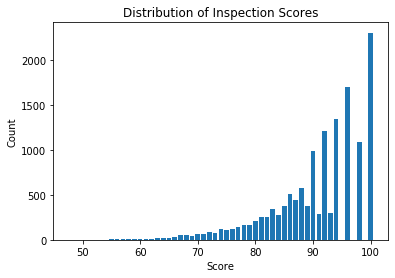

In [53]:
values = [0, 500, 1000, 1500, 2000]

plt.bar(ins.groupby('score').size().index, ins.groupby('score').size())
plt.title('Distribution of Inspection Scores')
plt.xlabel('Score')
plt.ylabel('Count')

In [54]:
ins.groupby('score').size().index

Int64Index([ 48,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
             64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
             77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
             90,  91,  92,  93,  94,  96,  98, 100],
           dtype='int64', name='score')

### Question 6b

Describe the qualities of the distribution of the inspections scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

<!--
BEGIN QUESTION
name: q6b
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

Overall, most of the inspections received a score of 100 (this is the mode). The graph is definitely left skewed, with most of the scores receiving a higher rating. Although, an unusual feature I discovered is that there are a small amount of inspections that received a score of about 92. There are also some gaps in the data once we reach a score of 90, it appears that if a restaurant scored between 90 and 100, they received a 95, 97, or 100.

My observations of the graph imply that most restaurants do well when they are being inspected. 

### Question 6c

Let's figure out which restaurants had the worst scores ever (single lowest score). Let's start by creating a new dataframe called `ins_named`. It should be exactly the same as `ins`, except that it should have the name and address of every business, as determined by the `bus` dataframe. If a `business_id` in `ins` does not exist in `bus`, the name and address should be given as NaN.

*Hint*: Use the merge method to join the `ins` dataframe with the appropriate portion of the `bus` dataframe. See the official [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) on how to use `merge`.

*Note*: For quick reference, a pandas 'left' join keeps the keys from the left frame, so if ins is the left frame, all the keys from ins are kept and if a set of these keys don't have matches in the other frame, the columns from the other frame for these "unmatched" key rows contains NaNs.

<!--
BEGIN QUESTION
name: q6c1
points: 1
-->

In [55]:
ins_named = ins.merge(bus[['business_id', 'name', 'address']], how='left')
ins_named.head()

,business_id,score,date,type,new_date,year,name,address
0,19,94,20160513,routine,2016-05-13,2016,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
1,19,94,20171211,routine,2017-12-11,2017,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
2,24,98,20171101,routine,2017-11-01,2017,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
3,24,98,20161005,routine,2016-10-05,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
4,24,96,20160311,routine,2016-03-11,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"


In [56]:
ok.grade("q6c1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In [57]:
# merge the ins dataframe with some of the bus dataframe

bus[['business_id', 'name', 'address']]

ins.merge(bus[['business_id', 'name', 'address']], how='left')



,business_id,score,date,type,new_date,year,name,address
0,19,94,20160513,routine,2016-05-13,2016,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
1,19,94,20171211,routine,2017-12-11,2017,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
2,24,98,20171101,routine,2017-11-01,2017,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
3,24,98,20161005,routine,2016-10-05,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
4,24,96,20160311,routine,2016-03-11,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
...,...,...,...,...,...,...,...,...
14217,94012,90,20180112,routine,2018-01-12,2018,UNA MAS MEXICAN GRILL,1 MARKET PL 23
14218,94133,100,20171227,routine,2017-12-27,2017,PAMPA BBQ,57 HORNE ST
14219,94142,100,20171220,routine,2017-12-20,2017,"DANDELION CHOCOLATE, INC.",1 FERRY BUILDING #14
14220,94189,96,20171130,routine,2017-11-30,2017,CHOUX,248 FILLMORE ST


Using this data frame, identify the restaurant with the lowest inspection scores ever. Head to yelp.com and look up the reviews page for this restaurant. Copy and paste anything interesting you want to share.

<!--
BEGIN QUESTION
name: q6c2
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

The business id with the lowest score of 48 is called Da Cafe. After searching it on Yelp, it is actually named "D & A Cafe", and has a 3 star rating on Yelp. I noticed a review saying that the California Department of Public Health closed the restaruant in April of 2019, which is fitting since this restaurant got the lowest inspection score!

In [58]:
display(ins_named['score'].sort_values())
ins_named.loc[13179]

13179     48
9476      52
8885      53
7104      54
2192      54
        ... 
3872     100
2413     100
11212    100
11188    100
6202     100
Name: score, Length: 14222, dtype: int64

business_id                  86647
score                           48
date                      20160907
type                       routine
new_date       2016-09-07 00:00:00
year                          2016
name                       DA CAFE
address            407 CLEMENT ST 
Name: 13179, dtype: object

Just for fun you can also look up the restaurants with the best scores. You'll see that lots of them aren't restaurants at all!

---
## 7: Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.

### Question 7a

Let's see which restaurant has had the most extreme improvement in its rating, aka scores. Let the "swing" of a restaurant be defined as the difference between its highest-ever and lowest-ever rating. **Only consider restaurants with at least 3 ratings, aka rated for at least 3 times (3 scores)!** Using whatever technique you want to use, assign `max_swing` to the name of restaurant that has the maximum swing.

*Note*: The "swing" is of a specific business. There might be some restaurants with multiple locations; each location has its own "swing".

<!--
BEGIN QUESTION
name: q7a1
points: 2
-->

In [59]:
def swing(series):
    if len(series) < 3:
        return 0
    return max(series) - min(series)
filtered = ins_named['score'].groupby(ins_named['business_id']).agg(swing).rename('swing')
bus_swing = pd.concat([bus.set_index('business_id'), filtered], axis = 1).sort_values('swing', ascending=False)
max_swing = bus_swing.iloc[0]['name']
max_swing

"JOANIE'S DINER INC."

In [60]:
ok.grade("q7a1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [61]:
ins_named.groupby('business_id')['score'].agg(np.ptp)

# gives us the number of times a certain business id occurs 
counts = ins_named['business_id'].value_counts()
# displays values that appear more than 3 times 
counts[counts >= 3]
filtered = ins_named[ins_named['business_id'].isin(counts[counts >= 3].index)]
# the difference in scores 
def swing(series):
    if len(series) < 3:
        return 0
    return max(series) - min(series)
max_swing = ins_named['score'].groupby(ins_named['business_id']).agg(swing).rename('swing')

max_swing





/srv/conda/envs/data100/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


business_id
19        0
24        2
31        0
45       10
48        0
         ..
94012     0
94133     0
94142     0
94189     0
94231     0
Name: swing, Length: 5766, dtype: int64

### Question 7b

To get a sense of the number of times each restaurant has been inspected, create a multi-indexed dataframe called `inspections_by_id_and_year` where each row corresponds to data about a given business in a single year, and there is a single data column named `count` that represents the number of inspections for that business in that year. The first index in the MultiIndex should be on `business_id`, and the second should be on `year`.

An example row in this dataframe might look tell you that business_id is 573, year is 2017, and count is 4.

*Hint*: Use groupby to group based on both the `business_id` and the `year`.

*Hint*: Use rename to change the name of the column to `count`.

<!--
BEGIN QUESTION
name: q7b
points: 2
-->

In [62]:
inspections_by_id_and_year = ins.groupby(['business_id', 'year']).count().drop(['date', 'type', 'new_date'], axis=1).rename(columns={'score':'count'})

inspections_by_id_and_year.head()

count
business_id year       
19          2016      1
            2017      1
24          2016      2
            2017      1
31          2015      1

In [63]:
ok.grade("q7b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [64]:
inspections_by_id_and_year = ins.groupby(['business_id', 'year']).count().drop(['date', 'type', 'new_date'], axis=1).rename(columns={'score':'count'})

inspections_by_id_and_year

count
business_id year       
19          2016      1
            2017      1
24          2016      2
            2017      1
31          2015      1
...                 ...
94012       2018      1
94133       2017      1
94142       2017      1
94189       2017      1
94231       2017      1

[11819 rows x 1 columns]

You should see that some businesses are inspected many times in a single year. Let's get a sense of the distribution of the counts of the number of inspections by calling `value_counts`. There are quite a lot of businesses with 2 inspections in the same year, so it seems like it might be interesting to see what we can learn from such businesses.

In [65]:
inspections_by_id_and_year['count'].value_counts()

1    9531
2    2175
3     111
4       2
Name: count, dtype: int64

### Question 7c

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2016 for this problem, using `ins2016` data frame that will be created for you below. 

First, make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2016).  This dataframe contains the field `score_pair` consisting of the score pairs **ordered chronologically**  `[first_score, second_score]`. 

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1. 

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary. 

The first few rows of the resulting table should look something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score_pair</th>
    </tr>
    <tr>
      <th>business_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>24</th>
      <td>[96, 98]</td>
    </tr>
    <tr>
      <th>45</th>
      <td>[78, 84]</td>
    </tr>
    <tr>
      <th>66</th>
      <td>[98, 100]</td>
    </tr>
    <tr>
      <th>67</th>
      <td>[87, 94]</td>
    </tr>
    <tr>
      <th>76</th>
      <td>[100, 98]</td>
    </tr>
  </tbody>
</table>

The scatter plot should look like this:

<img src="q7c2.png" width=500>

In the cell below, create `scores_pairs_by_business` as described above.

*Note: Each score pair must be a list type; numpy arrays will not pass the autograder.*

*Hint: Use the `filter` method from lecture 3 to create a new dataframe that only contains restaurants that received exactly 2 inspections.*

*Hint: Our code that creates the needed DataFrame is a single line of code that uses `sort_values`, `groupby`, `filter`, `groupby`, `agg`, and `rename` in that order. Your answer does not need to use these exact methods.*

<!--
BEGIN QUESTION
name: q7c1
points: 3
-->

In [66]:
# Create the dataframe here
ins2016 = ins[ins['year'] == 2016]
scores_pairs_by_business = ins2016.sort_values('date').groupby('business_id').filter(lambda x: len(x) ==2).groupby('business_id').agg({'score': lambda x: x.tolist()}).rename(columns={'score':'score_pair'})



5443

In [67]:
ok.grade("q7c1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [68]:
ins2016 = ins[ins['year'] == 2016]
ins2016.sort_values('date').groupby('business_id').filter(lambda x: len(x) ==2).groupby('business_id').agg({'score': lambda x: x.tolist()}).rename(columns={'score':'score_pair'})


,score_pair
business_id,
24,"[96, 98]"
45,"[78, 84]"
66,"[98, 100]"
67,"[87, 94]"
76,"[100, 98]"
...,...
87761,"[86, 92]"
87802,"[91, 98]"
88323,"[75, 75]"


Now, create your scatter plot in the cell below. It does not need to look exactly the same (e.g., no grid) as the above sample, but make sure that all labels, axes and data itself are correct.

Key pieces of syntax you'll need:
 + `plt.scatter` plots a set of points. Use `facecolors='none'` to make circle markers.
 + `plt.plot` for the reference line.
 + `plt.xlabel`, `plt.ylabel`, `plt.axis`, and `plt.title`.

*Note*: If you want to use another plotting library for your plots (e.g. `plotly`, `sns`) you are welcome to use that library instead so long as it works on DataHub.

*Hint*: You may find it convenient to use the `zip()` function to unzip scores in the list.
<!--
BEGIN QUESTION
name: q7c2
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

Text(0.5, 1.0, 'First Inspection Score vs. Second Inspection Score')

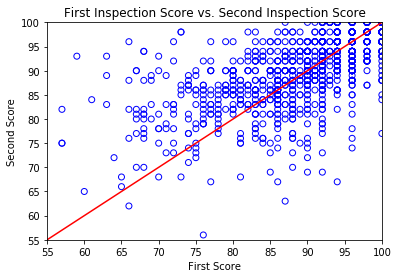

In [69]:
[first_score, second_score] = list(zip(*map(lambda a: tuple(a[0]), scores_pairs_by_business.values)))
plt.scatter(first_score, second_score, facecolors='none', edgecolors='b')
plt.plot([55,100], [55,100], 'r')
plt.axis([55,100, 55,100])
plt.xlabel('First Score')
plt.ylabel('Second Score')
plt.title('First Inspection Score vs. Second Inspection Score')

### Question 7d

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

The histogram should look like this:

<img src="q7d.png" width=500>

*Hint*: Use `second_score` and `first_score` created in the scatter plot code above.

*Hint*: Convert the scores into numpy arrays to make them easier to deal with.

*Hint*: Use `plt.hist()` Try changing the number of bins when you call `plt.hist()`.

<!--
BEGIN QUESTION
name: q7d
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

(array([  1.,   3.,   2.,   4.,   4.,   8.,   7.,  17.,  15.,  34.,  66.,
         90., 135., 218., 151., 115.,  63.,  44.,  38.,  20.,  11.,   5.,
          5.,   5.,   5.,   4.,   3.,   0.,   2.,   1.]),
 array([-27.        , -24.96666667, -22.93333333, -20.9       ,
        -18.86666667, -16.83333333, -14.8       , -12.76666667,
        -10.73333333,  -8.7       ,  -6.66666667,  -4.63333333,
         -2.6       ,  -0.56666667,   1.46666667,   3.5       ,
          5.53333333,   7.56666667,   9.6       ,  11.63333333,
         13.66666667,  15.7       ,  17.73333333,  19.76666667,
         21.8       ,  23.83333333,  25.86666667,  27.9       ,
         29.93333333,  31.96666667,  34.        ]),
 <a list of 30 Patch objects>)

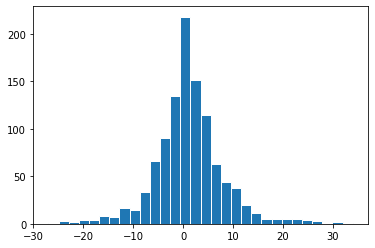

In [70]:
difference = [score_pair[1] - score_pair[0] for x in scores_pairs_by_business.values for score_pair in x]
plt.hist(difference, bins=30, ec='white')

### Question 7e

If a restaurant's score improves from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 7c? What do you see?

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 7d? What do you see?

<!--
BEGIN QUESTION
name: q7e
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

If a restaurant's score improves from the first to second inspection, you expect to see the point more towards the top left quadrant of the graph. Overall, most restaurant's had a high first and second score, so most of the points are in the top right quadrant of the graph. 

If a restaurant's score improves from the first to second inspection, you'd expect to see it in the right tail of the histogram since what we are recording is the difference in scores. But since most restaruants had a small difference in their first and second scores, the biggest difference is around 0. 

## Summary of the Inspections Data

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that many restaurants have more than one inspection a year. 
* By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.
* We identified the restaurant that had the largest swing in rating over time.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and may warrant further investigation. 


## Congratulations!

You are finished with Project 1. You'll need to make sure that your PDF exports correctly to receive credit. Run the cell below and follow the instructions.

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 13 EXPORTED QUESTIONS -->

In [71]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj1.ipynb', 'proj1.pdf')
ok.submit()

Generating PDF...
Saved proj1.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

ERROR  | auth.py:91 | {'error': 'invalid_grant'}


Saved 'proj1.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: jodiechin@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: pp0Ulfhtkl0QHMWdnWYf1PWR6kCtq6
Successfully logged in as jodiechin@berkeley.edu
Submit... 100% complete
Submission successful for user: jodiechin@berkeley.edu
URL: https://okpy.org/cal/data100/fa19/proj1/submissions/xnQ6RB

